# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev3 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev3 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#Split-into-sections" data-toc-modified-id="Split-into-sections-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split into sections</a></div><div class="lev1 toc-item"><a href="#Mouse" data-toc-modified-id="Mouse-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mouse</a></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Wed Sep 06 2017 

CPython 3.6.2
IPython 6.1.0

numpy 1.13.1
scipy 0.19.1
pandas 0.20.3
sklearn 0.19.0
matplotlib 2.0.2
seaborn 0.8.0
networkx 1.11
notebook 5.0.0
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.10.0-33-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

import time

### Autoimport my code

In [2]:
pwd

'/home/jessime/Code/kmers3/Notebooks/for_others'

In [3]:
cd ~/Code/kmers3/

/home/jessime/Code/kmers3


In [4]:
%load_ext autoreload

In [5]:
autoreload 2

### Plotting

In [6]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

I've got a list of lncRNAs. I want to know:

1. Counts
2. Similarities
3. How they look when clustered

In [7]:
infile = '/home/jessime/Research/for_others/keri_lncRNAs.csv'
df = pd.read_csv(infile, header=None)
df.head()

0
0     AC159540.1-001
1  RP11-501E14.1-001
2       OIP5-AS1-001
3  CTC-444N24.11-001
4           RMST-001

In [8]:
%aimport fasta

In [18]:
infasta = '/home/jessime/Research/v26_transcripts01.fa'
outfasta = '/home/jessime/Research/for_others/keri_lncRNAs.fa'

maker = fasta.Maker(infasta, outfasta)
filtered_fasta = maker.filter_name(list(set(df[0].values)))

AC092669.3-001 is not in fasta file
AL035610.2-001 is not in fasta file
AC098823.3-001 is not in fasta file
KANTR-001 is not in fasta file
LINC00657-001 is not in fasta file
AC015922.6-001 is not in fasta file
RP11-219G17.4-001 is not in fasta file
TINCR-001 is not in fasta file
AP000476.1-001 is not in fasta file
RP11-242F24.1-001 is not in fasta file
RP11-249M12.2-001 is not in fasta file
LINC01212-001 is not in fasta file


Interestingly, KANTR and TINCR have been re-annotated as protein coding genes. The others have been removed. 

I'm going to revert back to v22 and go with that. 

In [20]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
outfasta = '/home/jessime/Research/for_others/keri_lncRNAs.fa'

maker = fasta.Maker(infasta, outfasta)
filtered_fasta = maker.filter_name(list(set(df[0].values)))

Get normalized kmer counts using v22 vectors.

In [11]:
%aimport kmer_counts

In [22]:
infasta = '/home/jessime/Research/for_others/keri_lncRNAs.fa'
outfile = '/home/jessime/Research/for_others/keri_6mers.csv'

mean = '/home/jessime/Code/old_kmers/data/v22_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/v22_transcripts01_std6.npy'

names = fasta.Extracter(infasta).get_names('common')
counter = kmer_counts.BasicCounter(infasta, 
                                   outfile, 
                                   binary=False, 
                                   mean=mean, 
                                   std=std, 
                                   label=True)
counts = counter.make_count_file(names)

Widget Javascript not detected.  It may not be installed or enabled properly.


And let's get the similarity matrix.

In [10]:
%aimport pearson

In [33]:
sim = pearson.pearson(counts, counts)

sim = pd.DataFrame(sim, names, names)
sim.head()

AC007386.2-001  CTD-3051D23.4-001  RP11-697M17.2-001  \
AC007386.2-001           1.000000           0.096922          -0.071783   
CTD-3051D23.4-001        0.096922           1.000000          -0.000816   
RP11-697M17.2-001       -0.071783          -0.000816           1.000000   
RP1-293L8.2-001         -0.021841          -0.039774           0.068832   
LINC00887-001           -0.006488          -0.035668           0.088196   

                   RP1-293L8.2-001  LINC00887-001   H19-001  RP11-179K3.2-001  \
AC007386.2-001           -0.021841      -0.006488 -0.015593         -0.021714   
CTD-3051D23.4-001        -0.039774      -0.035668  0.043151          0.066468   
RP11-697M17.2-001         0.068832       0.088196  0.026360         -0.020574   
RP1-293L8.2-001           1.000000       0.025543 -0.067664          0.012644   
LINC00887-001             0.025543       1.000000  0.004007         -0.041674   

                   RP11-91I20.3-001  RP11-138E2.1-001  RP11-184D12.1-001  \
AC007386.2-001            -0.005477          0.062770          -0.030750   
CTD-3051D23.4-001          0.039257          0.261059          -0.013924   
RP11-697M17.2-001          0.122886         -0.020686           0.341820   
RP1-293L8.2-001            0.067305          0.005540           0.037246   
LINC00887-001              0.031212         -0.048502           0.025125   

                     ...      RP13-216E22.4-001  RP11-398H6.1-001  \
AC007386.2-001       ...              -0.066854         -0.008012   
CTD-3051D23.4-001    ...              -0.019908         -0.025608   
RP11-697M17.2-001    ...               0.125011         -0.000061   
RP1-293L8.2-001      ...               0.010793         -0.005162   
LINC00887-001        ...               0.023425          0.007623   

                   RP11-404O13.5-001  MIAT-001  RP11-53O19.3-001  \
AC007386.2-001             -0.040143  0.059420         -0.036706   
CTD-3051D23.4-001          -0.046988  0.025964         -0.005038   
RP11-697M17.2-001           0.281881 -0.070600          0.013722   
RP1-293L8.2-001             0.064877 -0.035076          0.088605   
LINC00887-001               0.072902  0.010778          0.018256   

                   RP13-631K18.2-001  LLNLR-246C6.1-001  RP11-473M20.16-001  \
AC007386.2-001              0.056272          -0.055828            0.037332   
CTD-3051D23.4-001           0.137861          -0.012631            0.182137   
RP11-697M17.2-001           0.007596           0.363537            0.000128   
RP1-293L8.2-001            -0.007957           0.038816           -0.073476   
LINC00887-001              -0.014571           0.057060           -0.031140   

                   RP11-692C24.2-001  THRIL-001  
AC007386.2-001             -0.019772  -0.033408  
CTD-3051D23.4-001          -0.029836  -0.011557  
RP11-697M17.2-001          -0.004863   0.112998  
RP1-293L8.2-001             0.033008   0.015652  
LINC00887-001              -0.019029   0.023889  

[5 rows x 116 columns]

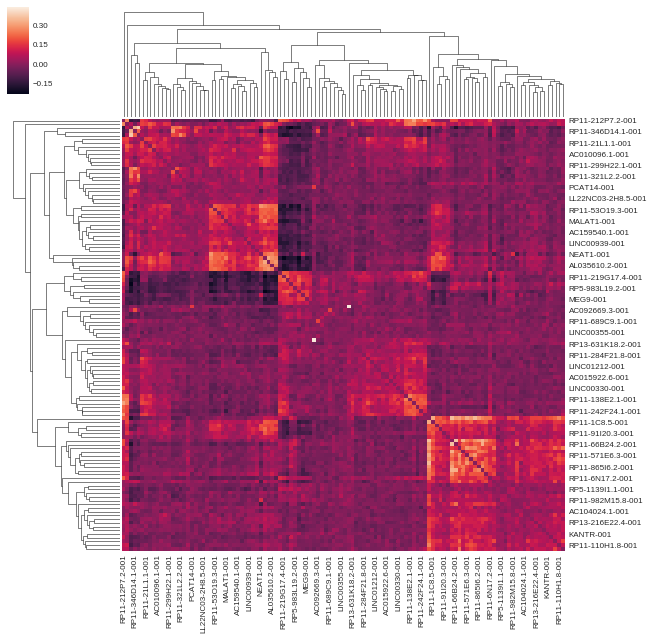

In [42]:
sim_plotting = pd.DataFrame(np.fill_diagonal(sim.values, 0), names, names)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
g = sns.clustermap(sim)

outfile = '/home/jessime/Research/for_others/keri_heatmap.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)

# Split into sections

For whatever reason, the lncRNAs are already grouped. So I'm going to do comparisons for each group individually.

In [59]:
def get_to_clustermap(n):
    #Setup
    infile = f'/home/jessime/Research/for_others/keri_lncRNAs{n}.csv'
    df = pd.read_csv(infile, header=None)
    infasta = '/home/jessime/Research/v22_transcripts01.fa'
    outfasta = f'/home/jessime/Research/for_others/keri_lncRNAs{n}.fa'

    maker = fasta.Maker(infasta, outfasta)
    filtered_fasta = maker.filter_name(list(set(df[0].values)))
    
    #Count
    infasta = f'/home/jessime/Research/for_others/keri_lncRNAs{n}.fa'
    outfile = f'/home/jessime/Research/for_others/keri_6mers{n}.csv'

    mean = '/home/jessime/Code/old_kmers/data/v22_transcripts01_mean6.npy'
    std = '/home/jessime/Code/old_kmers/data/v22_transcripts01_std6.npy'

    names = fasta.Extracter(infasta).get_names('common')
    counter = kmer_counts.BasicCounter(infasta, 
                                       outfile, 
                                       binary=False, 
                                       mean=mean, 
                                       std=std, 
                                       label=True)
    counts = counter.make_count_file(names)
    
    #Similarity
    sim = pearson.pearson(counts, counts)
    sim = pd.DataFrame(sim, names, names)
    outfile = f'/home/jessime/Research/for_others/keri_sim{n}.csv'
    
    #plotting
    sim_plotting = pd.DataFrame(np.fill_diagonal(sim.values, 0), names, names)
    g = sns.clustermap(sim)
    g.data2d.to_csv(outfile)
    outfile = f'/home/jessime/Research/for_others/keri_heatmap{n}.pdf'
    plt.savefig(outfile, bbox_inches='tight', dpi=600)
    return g

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


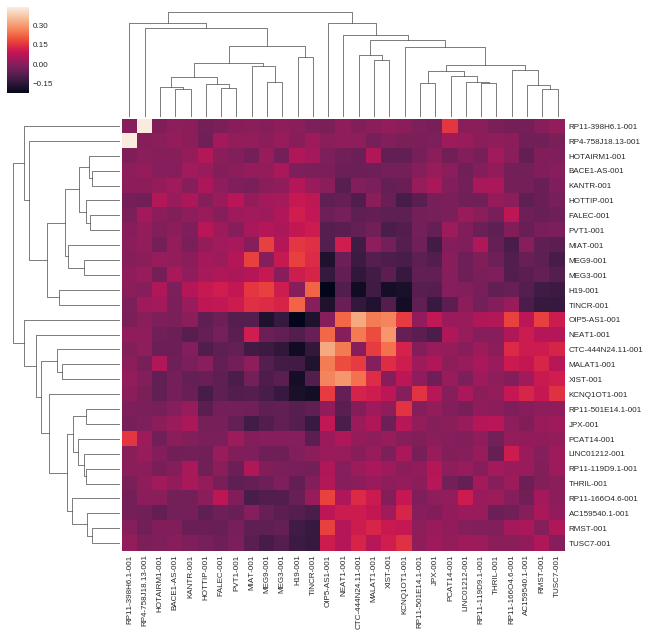

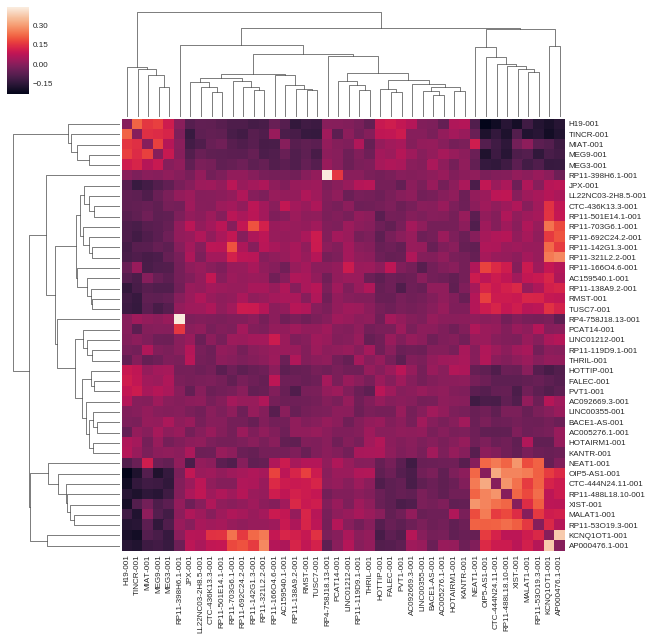

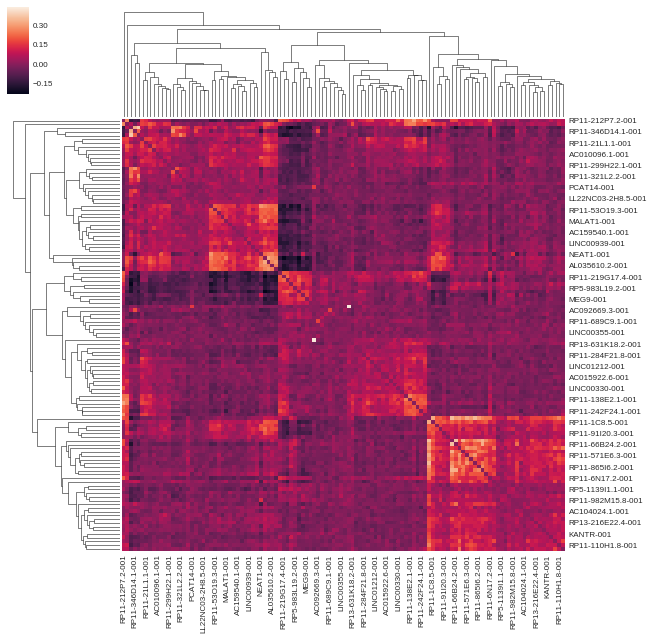

In [60]:
for i in range(1,4):
    get_to_clustermap(i)

Widget Javascript not detected.  It may not be installed or enabled properly.


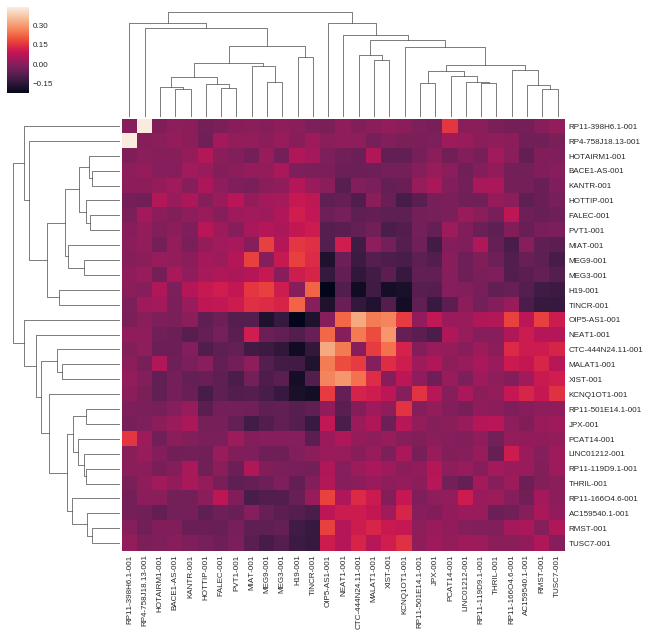

In [52]:
g = get_to_clustermap(1)

# Mouse

Widget Javascript not detected.  It may not be installed or enabled properly.


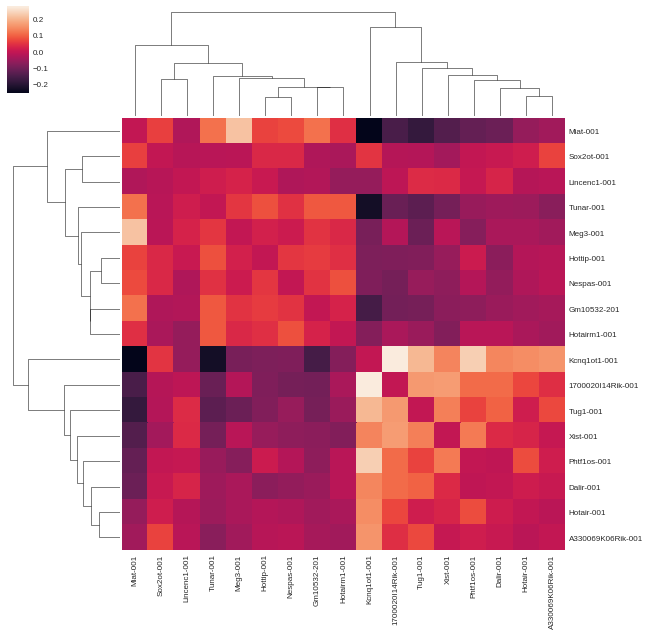

In [61]:
#Setup
infile = '/home/jessime/Research/for_others/keri_lncRNAs_M5.csv'
df = pd.read_csv(infile, header=None)
infasta = '/home/jessime/Research/M5_transcripts01.fa'
outfasta = '/home/jessime/Research/for_others/keri_lncRNAs_M5.fa'

maker = fasta.Maker(infasta, outfasta)
filtered_fasta = maker.filter_name(list(set(df[0].values)))

#Count
infasta = f'/home/jessime/Research/for_others/keri_lncRNAs_M5.fa'
outfile = f'/home/jessime/Research/for_others/keri_6mers_M5.csv'

mean = '/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'

names = fasta.Extracter(infasta).get_names('common')
counter = kmer_counts.BasicCounter(infasta, 
                                   outfile, 
                                   binary=False, 
                                   mean=mean, 
                                   std=std, 
                                   label=True)
counts = counter.make_count_file(names)

#Similarity
sim = pearson.pearson(counts, counts)
sim = pd.DataFrame(sim, names, names)
outfile = f'/home/jessime/Research/for_others/keri_sim_M5.csv'

#plotting
sim_plotting = pd.DataFrame(np.fill_diagonal(sim.values, 0), names, names)
g = sns.clustermap(sim)
g.data2d.to_csv(outfile)
outfile = f'/home/jessime/Research/for_others/keri_heatmap_M5.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)

In [12]:
infasta = f'/home/jessime/Research/for_others/keri_lncRNAs_M5.fa'
outfile = f'/home/jessime/Research/for_others/keri_6mers_M5.csv'

mean = '/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'

names = fasta.Extracter(infasta).get_names('common')
counter = kmer_counts.BasicCounter(infasta, 
                                   outfile, 
                                   binary=False, 
                                   mean=mean, 
                                   std=std, 
                                   label=True)
counts = counter.get_counts()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [15]:
counter.counts.shape

(17, 4096)

In [16]:
sim1 = pearson.pearson(counter.counts, counter.counts)

In [19]:
sim1

array([[  9.99999940e-01,   1.48617506e-01,   7.21802413e-02,
         -1.84001476e-02,   1.53031200e-02,  -4.21216488e-02,
         -1.12171788e-02,  -4.71812561e-02,  -3.19643021e-02,
         -2.46072095e-02,   1.50970835e-02,  -3.16911452e-02,
         -1.66218970e-02,   7.79628456e-02,  -5.52810542e-02,
          2.80283689e-02,   1.27388351e-02],
       [  1.48617506e-01,   9.99999940e-01,   2.74001777e-01,
         -8.44489336e-02,   2.02353671e-01,  -1.57928377e-01,
          1.58317298e-01,  -2.25084707e-01,  -7.73447603e-02,
         -8.34732279e-02,   5.03383428e-02,  -9.02257934e-02,
         -5.56304678e-02,   2.33016610e-01,  -2.52664298e-01,
          1.39632434e-01,   1.41121164e-01],
       [  7.21802413e-02,   2.74001777e-01,   9.99999762e-01,
         -8.25394839e-02,   1.63286895e-01,  -9.78292450e-02,
          4.17006351e-02,  -1.09316587e-01,  -3.04897204e-02,
         -9.44358110e-02,  -1.67529695e-02,  -2.00981367e-02,
         -7.57196825e-03,   1.11096352e-01

In [20]:
sim2 = np.corrcoef(counter.counts)
sim2.shape

(17, 17)

In [21]:
sim2

array([[  1.00000000e+00,   1.48617514e-01,   7.21802413e-02,
         -1.84001447e-02,   1.53031229e-02,  -4.21216364e-02,
         -1.12171863e-02,  -4.71812673e-02,  -3.19642991e-02,
         -2.46072126e-02,   1.50970875e-02,  -3.16911414e-02,
         -1.66218985e-02,   7.79628605e-02,  -5.52810427e-02,
          2.80283697e-02,   1.27388405e-02],
       [  1.48617514e-01,   1.00000000e+00,   2.74001798e-01,
         -8.44489312e-02,   2.02353670e-01,  -1.57928382e-01,
          1.58317309e-01,  -2.25084711e-01,  -7.73447780e-02,
         -8.34732135e-02,   5.03383554e-02,  -9.02257773e-02,
         -5.56304562e-02,   2.33016614e-01,  -2.52664302e-01,
          1.39632433e-01,   1.41121154e-01],
       [  7.21802413e-02,   2.74001798e-01,   1.00000000e+00,
         -8.25394926e-02,   1.63286913e-01,  -9.78292400e-02,
          4.17006313e-02,  -1.09316590e-01,  -3.04897214e-02,
         -9.44358057e-02,  -1.67529655e-02,  -2.00981272e-02,
         -7.57196897e-03,   1.11096373e-01